In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statistics as stat
import scipy.stats as stats
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#load the data
# df = pd.read_csv('SImplyHired_cleaned_data_updated.csv')
df = pd.read_csv("/content/SImplyHired_cleaned_data_new_3_20.csv")
pd.options.display.max_columns = None
df.head()

,company_name,title,summary,star,work_style,benefit,qualification,full description,duplicate count,city,state,min salary,max salary,experience_year,education,level,programming_language,other skill,trans star,trans min salary,trans max salary,trans experience_year,trans duplicate count,work_style_split,benefit_count,other_skill_count,programming_language_count,level_encoded,Contract,Freelance,Full-time,Internship,Part-time,Permanent,Temp-to-hire,Temporary,Associate's degree,Bachelor's degree,Doctor's degree,High school diploma or GED,Master's degree,Bash,C,C#,C++,COBOL,CSS,Crystal,Fortran,Go,HTML,Java,JavaScript,Kotlin,MATLAB,ML,PHP,Perl,Python,R,Red,Rust,SQL,Scala,Shell Script,Simula,Visual Basic
0,Subcodevs,Data Scientist,"In this role, you will collaborate with cross-...",3.7,"Full-time,Contract",NaN,"IT experience within retail, Power BI, Azure, ...",Job SummaryWe are seeking a skilled Data Scien...,1,United States,United States,26540.34,36824.28,7.5,"Master's degree,Doctor's degree",Mid-level,"Python,SQL,C,Simula","IT experience within retail, Power BI, Azure, ...",0.037240,-2.221424,-1.507342,1.861461,-0.519177,"['Full-time', 'Contract']",0,25,4,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,Louis Vuitton,JUNIOR DATA SCIENTIST,The succesful candidate will be recognized for...,3.6,NaN,"Disability insurance, Health insurance, Dental...","Power BI, Google Cloud Platform, Mid-level, Ta...",Poste\nLouis Vuitton is seeking a dynamic and ...,1,New York,NY,100000.00,115000.00,0.0,NaN,Mid-level,"Python,Go,SQL,C","Power BI, Google Cloud Platform, Mid-level, Ta...",-0.140941,-0.583684,-0.765747,-1.112598,-0.519177,[''],7,11,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,Outlier Ai,Data Scientist - AI Trainer,About the opportunity: Outlier is looking for ...,2.4,Freelance,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",Outlier helps the world’s most innovative comp...,1,Remote,Remote,38874.00,88350.00,0.0,Bachelor's degree,Mid-level,NaN,"Mathematics, Mid-level, Math, Bachelor's degree",-2.279110,-1.946452,-1.018556,-1.112598,-0.519177,['Freelance'],0,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Motus Recruiting and Staffing,Data Scientist (Remote),Assist developing reports in Workday and other...,3.0,"Full-time,Contract","Health insurance, Dental insurance, 401(k), Vi...","Power BI, Data mining, R, Mid-level, Tableau, ...","Data Scientist (Remote)Our client, a premier g...",7,Portland,OR,84816.00,84816.00,3.0,NaN,Mid-level,"Python,R,C","Power BI, Data mining, R, Mid-level, Tableau, ...",-1.210025,-0.922203,-1.052080,0.077025,3.206999,"['Full-time', 'Contract']",4,14,3,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,Vanderbilt University Medical Center,Data Scientist Associate,Guides and educates data science teams to prov...,3.7,Full-time,NaN,"Research, 3 years, Master's degree, Machine le...",Discover Vanderbilt University Medical Center ...,1,Nashville,TN,125300.00,182300.00,3.0,Master's degree,Senior level,"R,C","Research, 3 years, Master's degree, Machine le...",0.037240,-0.019636,-0.127322,0.077025,-0.519177,['Full-time'],0,8,2,2,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


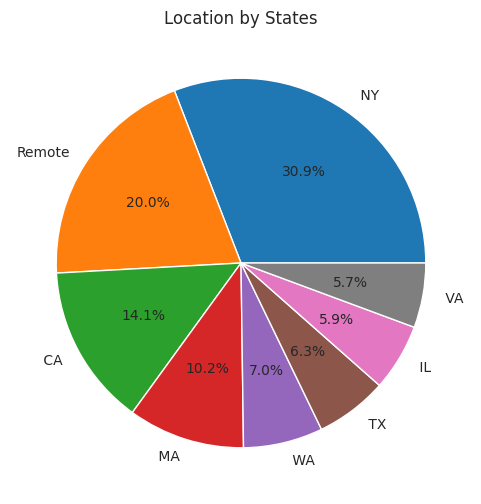

In [15]:
#pie chart

#clean
y = df['state'].value_counts()
# only want the first 11 values
states_to_keep = ['Remote', ' CA', ' VA', ' WA', ' MA', ' NY', ' TX', ' IL']
# Filter the DataFrame
filtered_df = df[df['state'].isin(states_to_keep)]
filtered_df['state'].value_counts()

#plot
y = filtered_df['state'].value_counts()
labels = filtered_df['state'].unique()

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(y, labels = labels, autopct='%1.1f%%')
plt.title('Location by States')
plt.show()

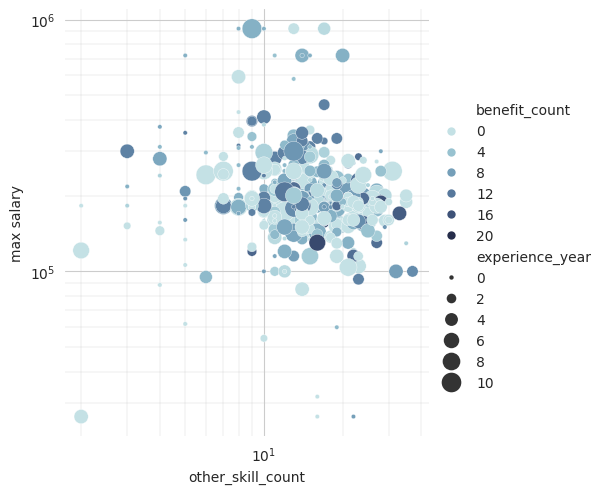

In [16]:
# Scatterplot

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=filtered_df,
    x="other_skill_count", y="max salary",
    hue="benefit_count", size="experience_year",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [17]:
# make new column for avg salary

filtered_df['Average_Salary'] = (filtered_df['trans min salary'] + filtered_df['trans max salary']) / 2


<ipython-input-17-ffa7986e9d74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Average_Salary'] = (filtered_df['trans min salary'] + filtered_df['trans max salary']) / 2


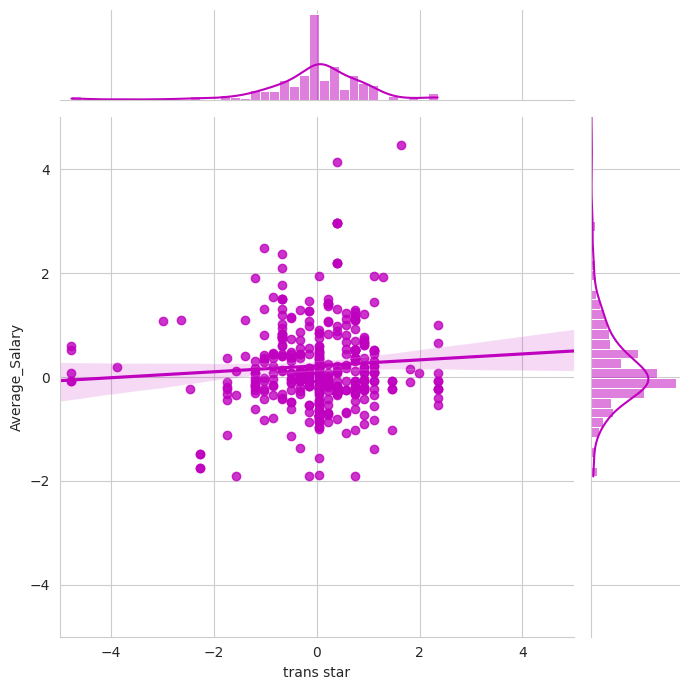

In [18]:
# Linear regression with marginal distributions
g = sns.jointplot(x="trans star", y="Average_Salary", data=filtered_df,
                  kind="reg", truncate=False,
                  xlim=(-5, 5), ylim=(-5, 5),
                  color="m", height=7)

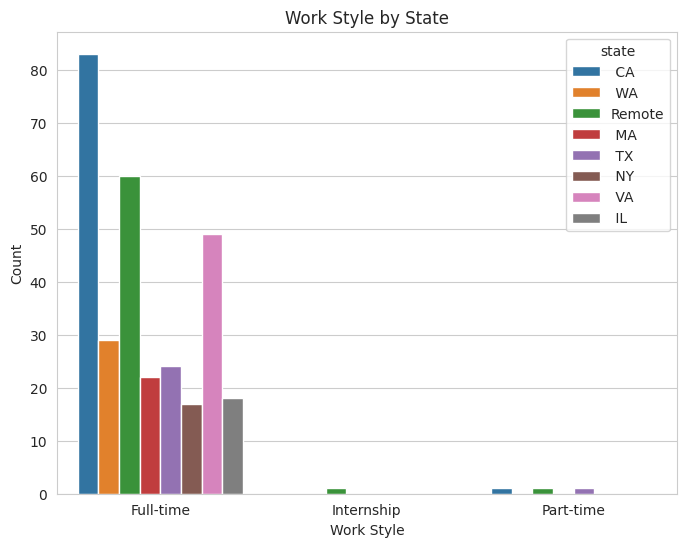

In [19]:
# bar chart

#clean
filtered_df['work_style'].unique()
keep = ['Full-time', 'Part-time', 'Internship']
filtered_df1 = filtered_df[filtered_df['work_style'].isin(keep)]

#plot
plt.figure(figsize=(8, 6))
sns.countplot(x = filtered_df1["work_style"],
              hue = filtered_df1["state"],
              data = filtered_df1)
plt.title('Work Style by State')
plt.xlabel('Work Style')
plt.ylabel('Count')
plt.show()

In [20]:
df1 = pd.read_csv('LinkedIn_cleaned_data.csv')
df1.head()

,job_title,company_name,num_applicants,description,Seniority level,Employment type,Job function,Industries,city,state,adjusted time_posted,min salary,max salary
0,Data Scientists,Further,155.000000,If you love data and are looking for unlimited...,Entry level,Full-time,Engineering and Information Technology,Business Consulting and Services,Cleveland,OH,30.0,92500.000000,100000.000000
1,Data Scientist(Junior),SynergisticIT,31.000000,"At SynergisticIT, we aim to bring aboard IT pr...",Entry level,Part-time,Engineering and Information Technology,IT Services and IT Consulting,Ohio,United States,150.0,103327.000000,182983.000000
2,Junior Data Scientist - Remote,SynergisticIT,85.699248,Since 2010 Synergisticit has helped Jobseekers...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,Columbus,OH,150.0,100977.222222,126081.444444
3,Data Scientist I,ConstructConnect,85.699248,This position sits within our Product Developm...,Entry level,Full-time,Engineering and Information Technology,Software Development,Cincinnati,OH,7.0,80975.333333,129623.666667
4,Data Scientist(Remote),SynergisticIT,85.699248,Synergistic IT is a full-service staffing and ...,Entry level,Full-time,Engineering and Information Technology,IT Services and IT Consulting,Columbus,OH,150.0,100977.222222,126081.444444


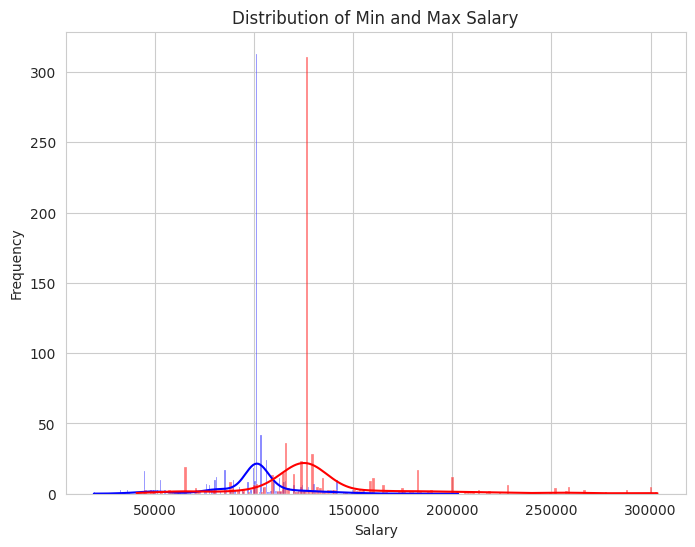

In [21]:
# histogram
plt.figure(figsize=(8, 6))
sns.histplot(x = df1["min salary"], color="blue", label="Min Salary", kde = True)
sns.histplot(x = df1["max salary"], color="red", label="Max Salary", kde = True)

plt.title('Distribution of Min and Max Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [22]:
# clean
duplicates = df1.duplicated().sum()
if duplicates > 0:
    df1.drop_duplicates(inplace=True)


#  labeled intervals Plot

# plot
df1["start"] = pd.to_datetime(df1["start"])
df1["stop"] = pd.to_datetime(df1["stop"])

cap, start, stop = df1['caption'], df1['start'], df1['stop']

#Check the status, because we paint all lines with the same color
#together
is_ok = (df1['state'] == 'OK')
not_ok = np.logical_not(is_ok)

#Get unique captions and there indices and the inverse mapping
captions, unique_idx, caption_inv = np.unique(cap, 1, 1)

#Build y values from the number of unique captions.
y = (caption_inv + 1) / float(len(captions) + 1)

#Plot function
def timelines(y, xstart, xstop, color='b'):
    """Plot timelines at y from xstart to xstop with given color."""
    plt.hlines(y, xstart, xstop, color, lw=4)
    plt.vlines(xstart, y+0.03, y-0.03, color, lw=2)
    plt.vlines(xstop, y+0.03, y-0.03, color, lw=2)


#Setup the plot
ax = plt.gca()

#To adjust the xlimits a timedelta is needed.
delta = (stop.max() - start.min())/10

plt.yticks(y[unique_idx], captions)
plt.ylim(0,1)
plt.xlim(start.min()-delta, stop.max()+delta)
plt.xlabel('Time')
plt.show()

KeyError: 'start'

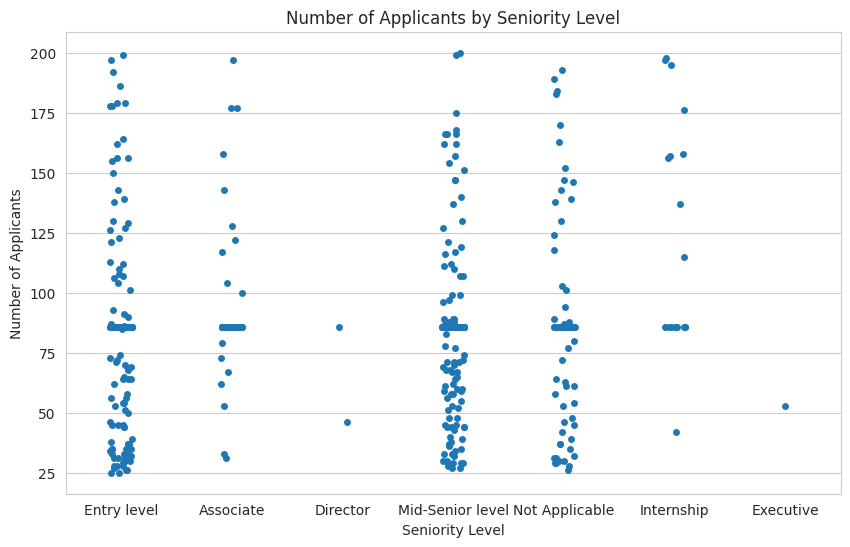

In [23]:
df1['Seniority level'].unique()

# stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Seniority level', y='num_applicants', data=df1)
plt.title('Number of Applicants by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Number of Applicants')
plt.show()

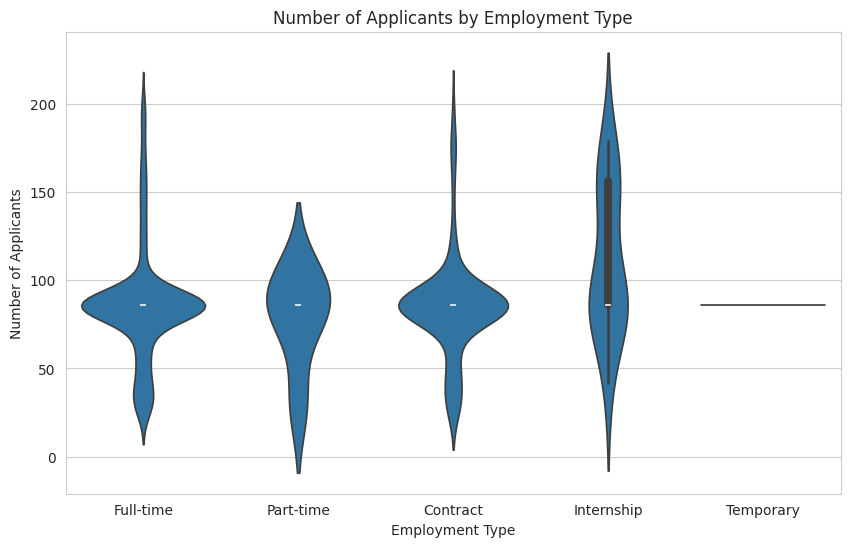

In [24]:
df1['Employment type'].unique()

# violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Employment type', y='num_applicants', data=df1)
plt.title('Number of Applicants by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Applicants')
plt.show()

In [25]:
df_sal = df.copy()
df_sal["state"] = df_sal['state'].str.strip()

state_min_salary = df_sal.groupby("state")["min salary"].mean().reset_index()
state_min_salary.columns = ["State", "Min Salary"]
print(state_min_salary)

# setting map
fig_min_salary = px.choropleth(
    state_min_salary, # dataframe
    locations='State', # column name
    locationmode="USA-states", # location
    color='Min Salary', # color change
    color_continuous_scale=["white", "darkblue"], # color
    title="The Mean of Min Salry in Each US State", # title
    labels={"Min Salary": "Mean of Min Salary", "State": "US State"} # label
)

# map initial position
fig_min_salary.update_geos(
    visible=True,
    projection_type="albers usa",  # use the Albers projection for better US map focus
    center={"lat": 37.9002, "lon": -95.7129},  # center on the US
    projection_scale=1,  # zoom level
    lataxis_range=[24, 50],  # latitude range
    lonaxis_range=[-125, -66]  # longitude range
)

# show the graph
fig_min_salary.show()

            State     Min Salary
0              AL   90333.000000
1              AZ  116188.000000
2              CA  151343.320915
3              CO   93924.857143
4              CT  129660.818182
5              DC   92656.000000
6              FL  105731.888889
7              GA   89732.857143
8              HI   58296.000000
9              IA  105875.000000
10             ID  125300.000000
11             IL  116792.028269
12             IN  102980.000000
13             KS  108480.000000
14             KY   30000.000000
15             LA  125300.000000
16             MA  128363.103448
17             MD   92010.482857
18             MI  113888.075000
19             MN   99673.562500
20             MO  123533.333333
21             MS  125300.000000
22             NC   96171.066667
23             ND  100000.000000
24             NE  153783.333333
25             NH  125300.000000
26             NJ  122849.375000
27             NM  103554.000000
28             NV   99483.333333
29        

In [26]:
state_max_salary = df_sal.groupby("state")["max salary"].mean().reset_index()
state_max_salary.columns = ["State", "Max Salary"]
print(state_max_salary)

# setting map
fig_max_salary = px.choropleth(
    state_max_salary, # dataframe
    locations='State', # column name
    locationmode="USA-states", # location
    color='Max Salary', # color change
    color_continuous_scale=["white", "darkblue"], # color
    title="The Mean of Max Salry in Each US State", # title
    labels={"Max Salary": "Mean of Max Salary", "State": "US State"} # label
)

# map initial position
fig_max_salary.update_geos(
    visible=True,
    projection_type="albers usa",  # use the Albers projection for better US map focus
    center={"lat": 37.9002, "lon": -95.7129},  # center on the US
    projection_scale=1,  # zoom level
    lataxis_range=[24, 50],  # latitude range
    lonaxis_range=[-125, -66]  # longitude range
)

# show the graph
fig_max_salary.show()

            State     Max Salary
0              AL  146085.000000
1              AZ  177245.000000
2              CA  239149.067535
3              CO  125707.142857
4              CT  193345.363636
5              DC  118558.000000
6              FL  154119.888889
7              GA  132770.785714
8              HI   71016.000000
9              IA  149575.000000
10             ID  182300.000000
11             IL  171225.961538
12             IN  169308.000000
13             KS  152333.333333
14             KY   45000.000000
15             LA  182300.000000
16             MA  177610.862069
17             MD  153923.217143
18             MI  154122.918750
19             MN  157232.500000
20             MO  178200.000000
21             MS  182300.000000
22             NC  131281.200000
23             ND  135000.000000
24             NE  208060.000000
25             NH  182300.000000
26             NJ  183080.375000
27             NM  160409.000000
28             NV  129050.000000
29        